# MACHINE LEARNING CLASSIFICATION AND COMPARISONS

This notebook we have used 6 different ML classifiers and compared them to find the best one that can accurately classify our malicious dataset.

## Installing some libraries.

In [2]:
pip install smote_variants

     |████████████████████████████████| 133kB 3.4MB/s 
  Created wheel for minisom: filename=MiniSom-2.2.5-cp36-none-any.whl size=8474 sha256=fd932f0011f6c4dd9c1225ed66e0808011ee2fb909b65fca70652574a16f3d4a
  Stored in directory: /root/.cache/pip/wheels/39/5b/16/cc9402ffc58cafb1da6997e5c94b1bde65e8cb214907879fd4
  Created wheel for statistics: filename=statistics-1.0.3.5-cp36-none-any.whl size=7453 sha256=130556c405bb0a19fb129b76ed39ed7d4c9c57c932fdf479a5b33c19331ace92
  Stored in directory: /root/.cache/pip/wheels/75/55/90/73aa7662bfb4565b567618547a275f01372a678ca92ecd64f3
Successfully built minisom statistics


In [3]:
pip install imbalanced_databases

     |████████████████████████████████| 4.3MB 3.4MB/s 


In [4]:
pip install imbalanced-learn

## Importing libraries for our needs.

In [5]:
import smote_variants as sv
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import imbalanced_databases as imbd
from sklearn import metrics
from sklearn.datasets import load_wine
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from imblearn.over_sampling import SMOTE

%matplotlib inline
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Reading the dataset to a dataframe.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df_train = pd.read_csv('/content/drive/My Drive/Major Project Works/dataset/ml_dataset.csv')

In [0]:
df = df_train.copy()
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [9]:
df.columns

Index(['pkts', 'bytes', 'dur', 'average_dur', 'stddev_dur', 'total_dur',
       'min_dur', 'max_dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate',
       'srate', 'drate', 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP',
       'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP',
       'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP',
       'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport',
       'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP',
       'attack'],
      dtype='object')

In [0]:
df.drop([ 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP',
       'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP',
       'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP',
       'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport',
       'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP'],axis=1,inplace=True)

## Getting genral idea about the weight of available classification packets.

In [11]:
df.head()

,pkts,bytes,dur,average_dur,stddev_dur,total_dur,min_dur,max_dur,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack
0,10,1729,6.406424,0.679473,0.544126,1.358946,0.135347,1.223599,6,4,963,766,1.404840,0.780467,0.468280,1
1,10,1604,6.405851,0.679572,0.544197,1.359144,0.135375,1.223769,6,4,838,766,1.404966,0.780536,0.468322,1
2,8,1708,6.401038,1.110847,1.110847,2.221694,0.000000,2.221694,5,3,1008,700,1.093573,0.624899,0.900214,1
3,8,1462,6.400703,1.113328,1.113328,2.226655,0.000000,2.226655,5,3,762,700,1.093630,0.624931,0.898208,1
4,8,1296,6.400472,1.113098,1.113098,2.226195,0.000000,2.226195,5,3,596,700,1.093669,0.624954,0.898394,1


1    1926624
0        477
Name: attack, dtype: int64

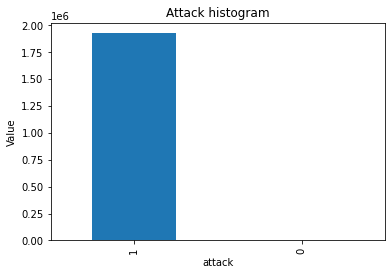

In [12]:
pd.value_counts(df['attack']).plot.bar()
plt.title('Attack histogram')
plt.xlabel('attack')
plt.ylabel('Value')
df['attack'].value_counts()

 #### Here we can find that there is a lot of imbalance in the dataset, so we can tell the data is highly-imballanced. Thus we need to synthtically oversample the minority class to get a balanced dataset for training and testing.

## Defining some methods which are later used:

In [0]:
# Used to plot the roc curve.
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
# Used for classification of dataset.
def classif_results(): 
  conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
  print('Confusion matrix:\n', conf_mat)

  labels = ['Class 0', 'Class 1']
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.xlabel('Predicted')
  plt.ylabel('Expected')
  plt.show()

  print("Accuracy", metrics.accuracy_score(y_test, y_pred))

  from sklearn.metrics import classification_report
  print(classification_report(y_test, y_pred))


  auc = roc_auc_score(y_test, y_pred)
  print("AUC Score: ")
  print(auc)

  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  plot_roc_curve(fpr, tpr)

# Used for splitting and normalizing dataset.
def test_scale():
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

  from sklearn.preprocessing import StandardScaler
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

### Here, we are applying SMOTE method, and applying it to dataset. We use the daataset by applying attack packets to X and normal to Y and oversample Y sythetically to length of X

In [14]:
X = df.iloc[:, df.columns != 'attack']
y = df.iloc[:, df.columns == 'attack']
X, y = SMOTE().fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Logistic Regression:


In [0]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Confusion matrix:
 [[766800   4774]
 [146920 622806]]


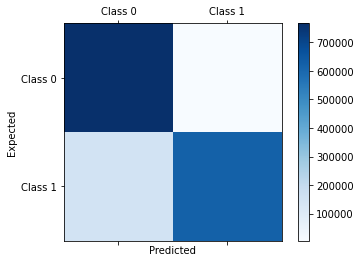

Accuracy 0.9015804840070071
              precision    recall  f1-score   support

           0       0.84      0.99      0.91    771574
           1       0.99      0.81      0.89    769726

    accuracy                           0.90   1541300
   macro avg       0.92      0.90      0.90   1541300
weighted avg       0.92      0.90      0.90   1541300

AUC Score: 
0.9014697660119697


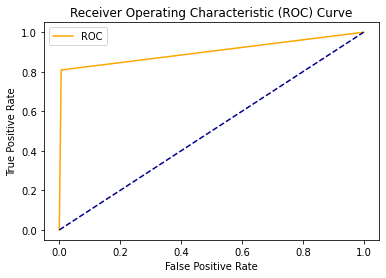

In [0]:
classif_results()

# Decision Trees

In [0]:
test_scale()

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)



Confusion matrix:
 [[771574      0]
 [     7 769719]]


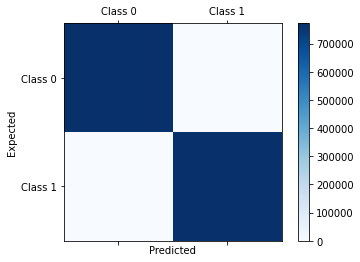

Accuracy 0.9999954583792902
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    771574
           1       1.00      1.00      1.00    769726

    accuracy                           1.00   1541300
   macro avg       1.00      1.00      1.00   1541300
weighted avg       1.00      1.00      1.00   1541300

AUC Score: 
0.9999954529274053


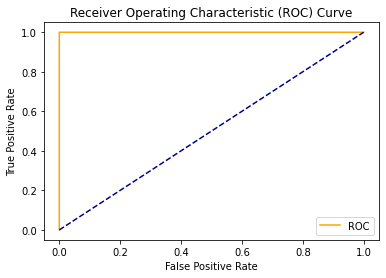

In [0]:
classif_results()

# Random Forest:

In [0]:
test_scale()

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

Confusion matrix:
 [[771574      0]
 [     5 769721]]


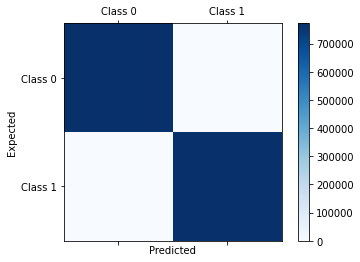

Accuracy 0.9999967559852073
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    771574
           1       1.00      1.00      1.00    769726

    accuracy                           1.00   1541300
   macro avg       1.00      1.00      1.00   1541300
weighted avg       1.00      1.00      1.00   1541300

AUC Score: 
0.9999967520910038


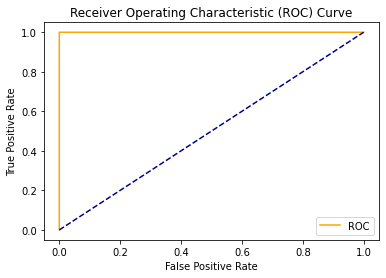

In [0]:
classif_results()

# KNN

In [0]:
test_scale()


from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

Confusion matrix:
 [[771554     20]
 [    23 769703]]


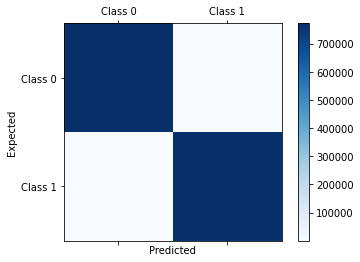

Accuracy 0.9999721014727827
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    771574
           1       1.00      1.00      1.00    769726

    accuracy                           1.00   1541300
   macro avg       1.00      1.00      1.00   1541300
weighted avg       1.00      1.00      1.00   1541300

AUC Score: 
0.9999720990989526


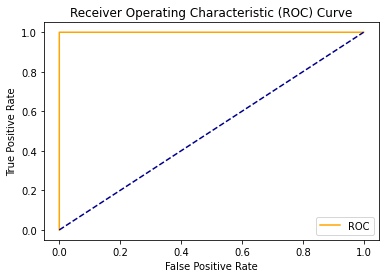

In [0]:
classif_results()

# Support Vector Machines:

In [16]:
 test_scale()

# Fitting SVM to the Training set
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Confusion matrix:
 [[746148  25426]
 [146942 622784]]


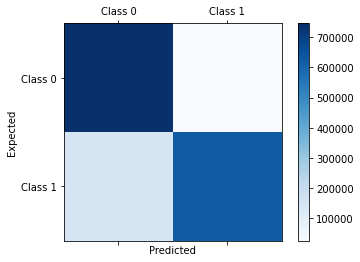

Accuracy 0.8881671316421202
              precision    recall  f1-score   support

           0       0.84      0.97      0.90    771574
           1       0.96      0.81      0.88    769726

    accuracy                           0.89   1541300
   macro avg       0.90      0.89      0.89   1541300
weighted avg       0.90      0.89      0.89   1541300

AUC Score: 
0.8880724426063111


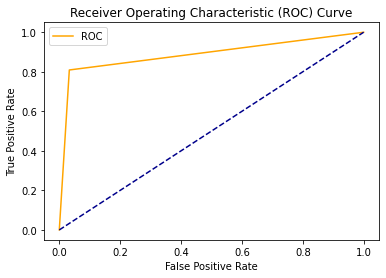

In [17]:
classif_results()

# Naive Bayes Classifier

In [0]:
test_scale()

# Fitting SVM to the Training set
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
classifier = GaussianNB()

# Train the model using the training sets
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

Confusion matrix:
 [[222418 549156]
 [   265 769461]]


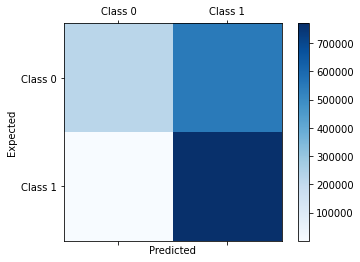

Accuracy 0.6435340297151755
              precision    recall  f1-score   support

           0       1.00      0.29      0.45    771574
           1       0.58      1.00      0.74    769726

    accuracy                           0.64   1541300
   macro avg       0.79      0.64      0.59   1541300
weighted avg       0.79      0.64      0.59   1541300

AUC Score: 
0.6439605039656615


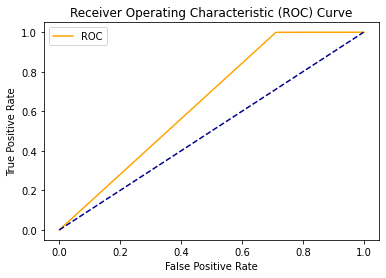

In [0]:
classif_results()

# Neural Network

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense


classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 3)

# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


Epoch 1/3
2311948/2311948 [==============================] - 247s 107us/step - loss: 0.1406 - accuracy: 0.9542
Epoch 2/3
2311948/2311948 [==============================] - 245s 106us/step - loss: 0.1170 - accuracy: 0.9655
Epoch 3/3
2311948/2311948 [==============================] - 245s 106us/step - loss: 0.1095 - accuracy: 0.9664


Confusion matrix:
 [[769993   1581]
 [ 50382 719344]]


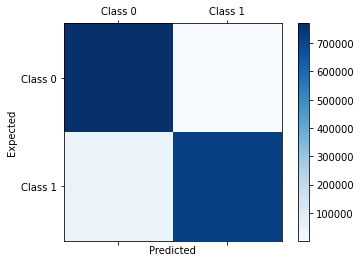

Accuracy 0.9662862518653085
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    771574
           1       1.00      0.93      0.97    769726

    accuracy                           0.97   1541300
   macro avg       0.97      0.97      0.97   1541300
weighted avg       0.97      0.97      0.97   1541300

AUC Score: 
0.9662482407112907


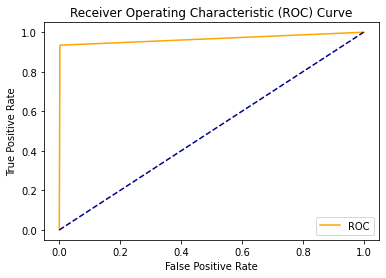

In [0]:
classif_results()

In [0]:
# RESULTS: